<a href="https://colab.research.google.com/github/whoisprakhar44/Skin-Cancer-Detection/blob/main/skinCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.20G/5.20G [02:35<00:00, 37.9MB/s]
100% 5.20G/5.20G [02:35<00:00, 36.0MB/s]


## Extracting Data from Zip File

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/skin-cancer-mnist-ham10000.zip', 'r') as obj:
  obj.extractall(path = '/content/skin-cancer-mnist-ham10000')

In [ ]:
from glob import glob

In [ ]:
base_skin_dir = os.path.join('..', '/content/skin-cancer-mnist-ham10000/')

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

## Reading csv Filse

In [ ]:
import pandas as pd

In [ ]:
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

In [ ]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


we will add the image path, type and type_idx

In [ ]:
skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get)
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [ ]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/skin-cancer-mnist-ham10000/HAM10000_i...,Benign keratosis-like lesions,2


## Data Preprocessing

In [ ]:
skin_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

filling missing age value by its mean

In [ ]:
skin_df.dropna(inplace=True)

In [ ]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [ ]:
skin_df.dtypes

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
cell_type_idx       int8
dtype: object

##EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<Axes: xlabel='cell_type'>

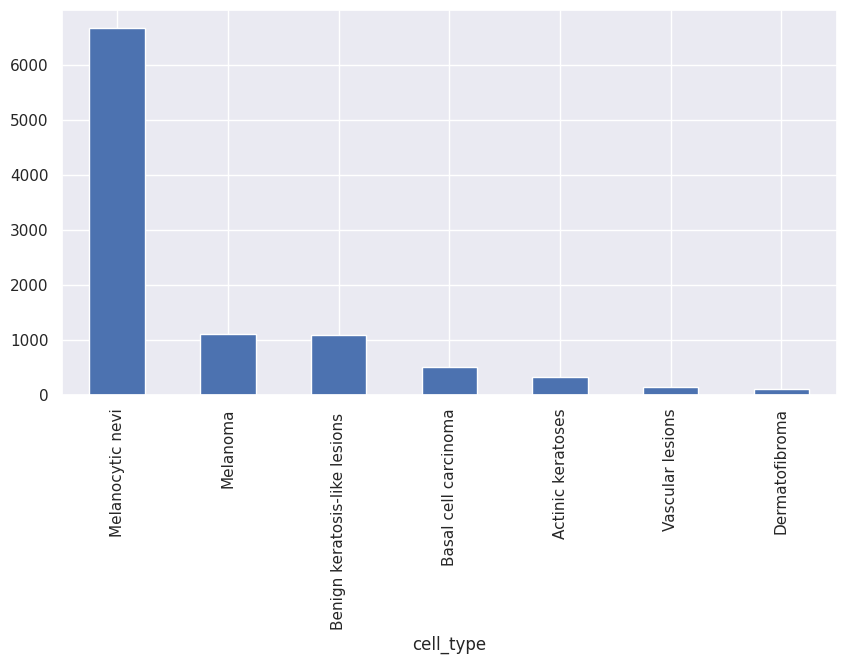

In [ ]:
plt.figure(figsize = (10, 5))
skin_df['cell_type'].value_counts().plot(kind='bar')


<Axes: xlabel='dx_type'>

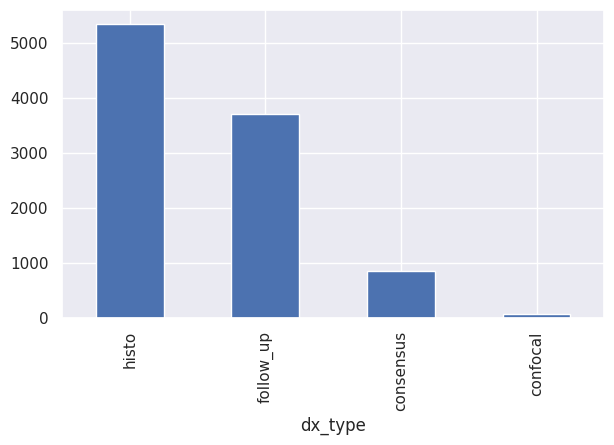

In [ ]:
plt.figure(figsize=(7, 4))
skin_df['dx_type'].value_counts().plot(kind='bar')

<Axes: xlabel='localization'>

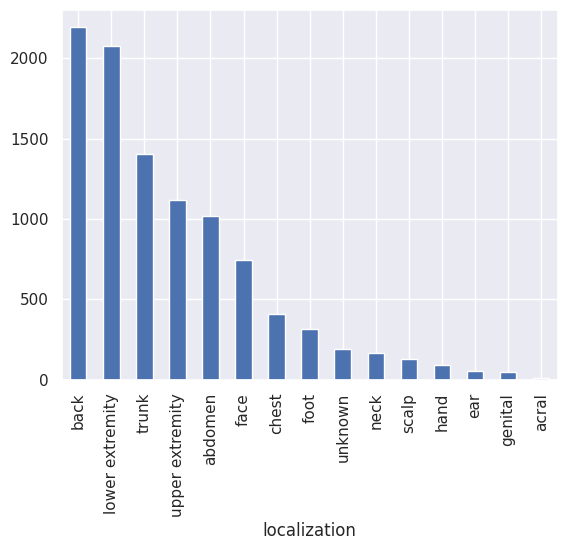

In [ ]:
skin_df['localization'].value_counts().plot(kind = 'bar')

<Axes: >

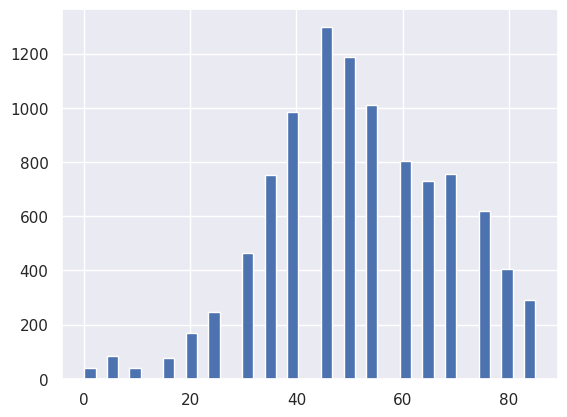

In [ ]:
skin_df['age'].hist(bins=40)

<Axes: xlabel='sex'>

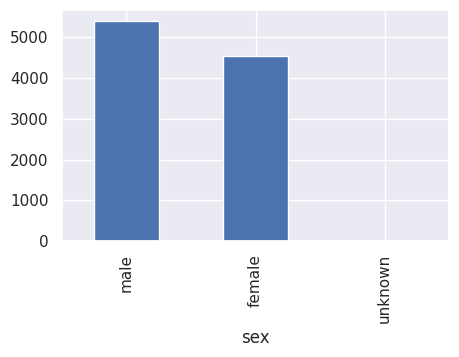

In [ ]:
plt.figure(figsize=(5, 3))
skin_df['sex'].value_counts().plot(kind='bar')

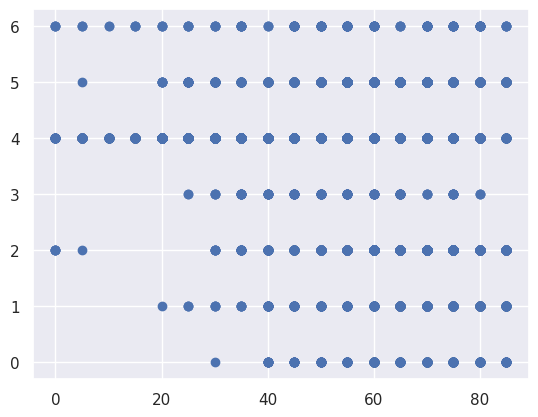

In [ ]:
plt.scatter(skin_df['age'], skin_df['cell_type_idx'])

## Image Preprocessing

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((128, 128))))

In [ ]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/skin-cancer-mnist-ham10000/HAM10000_i...,Benign keratosis-like lesions,2


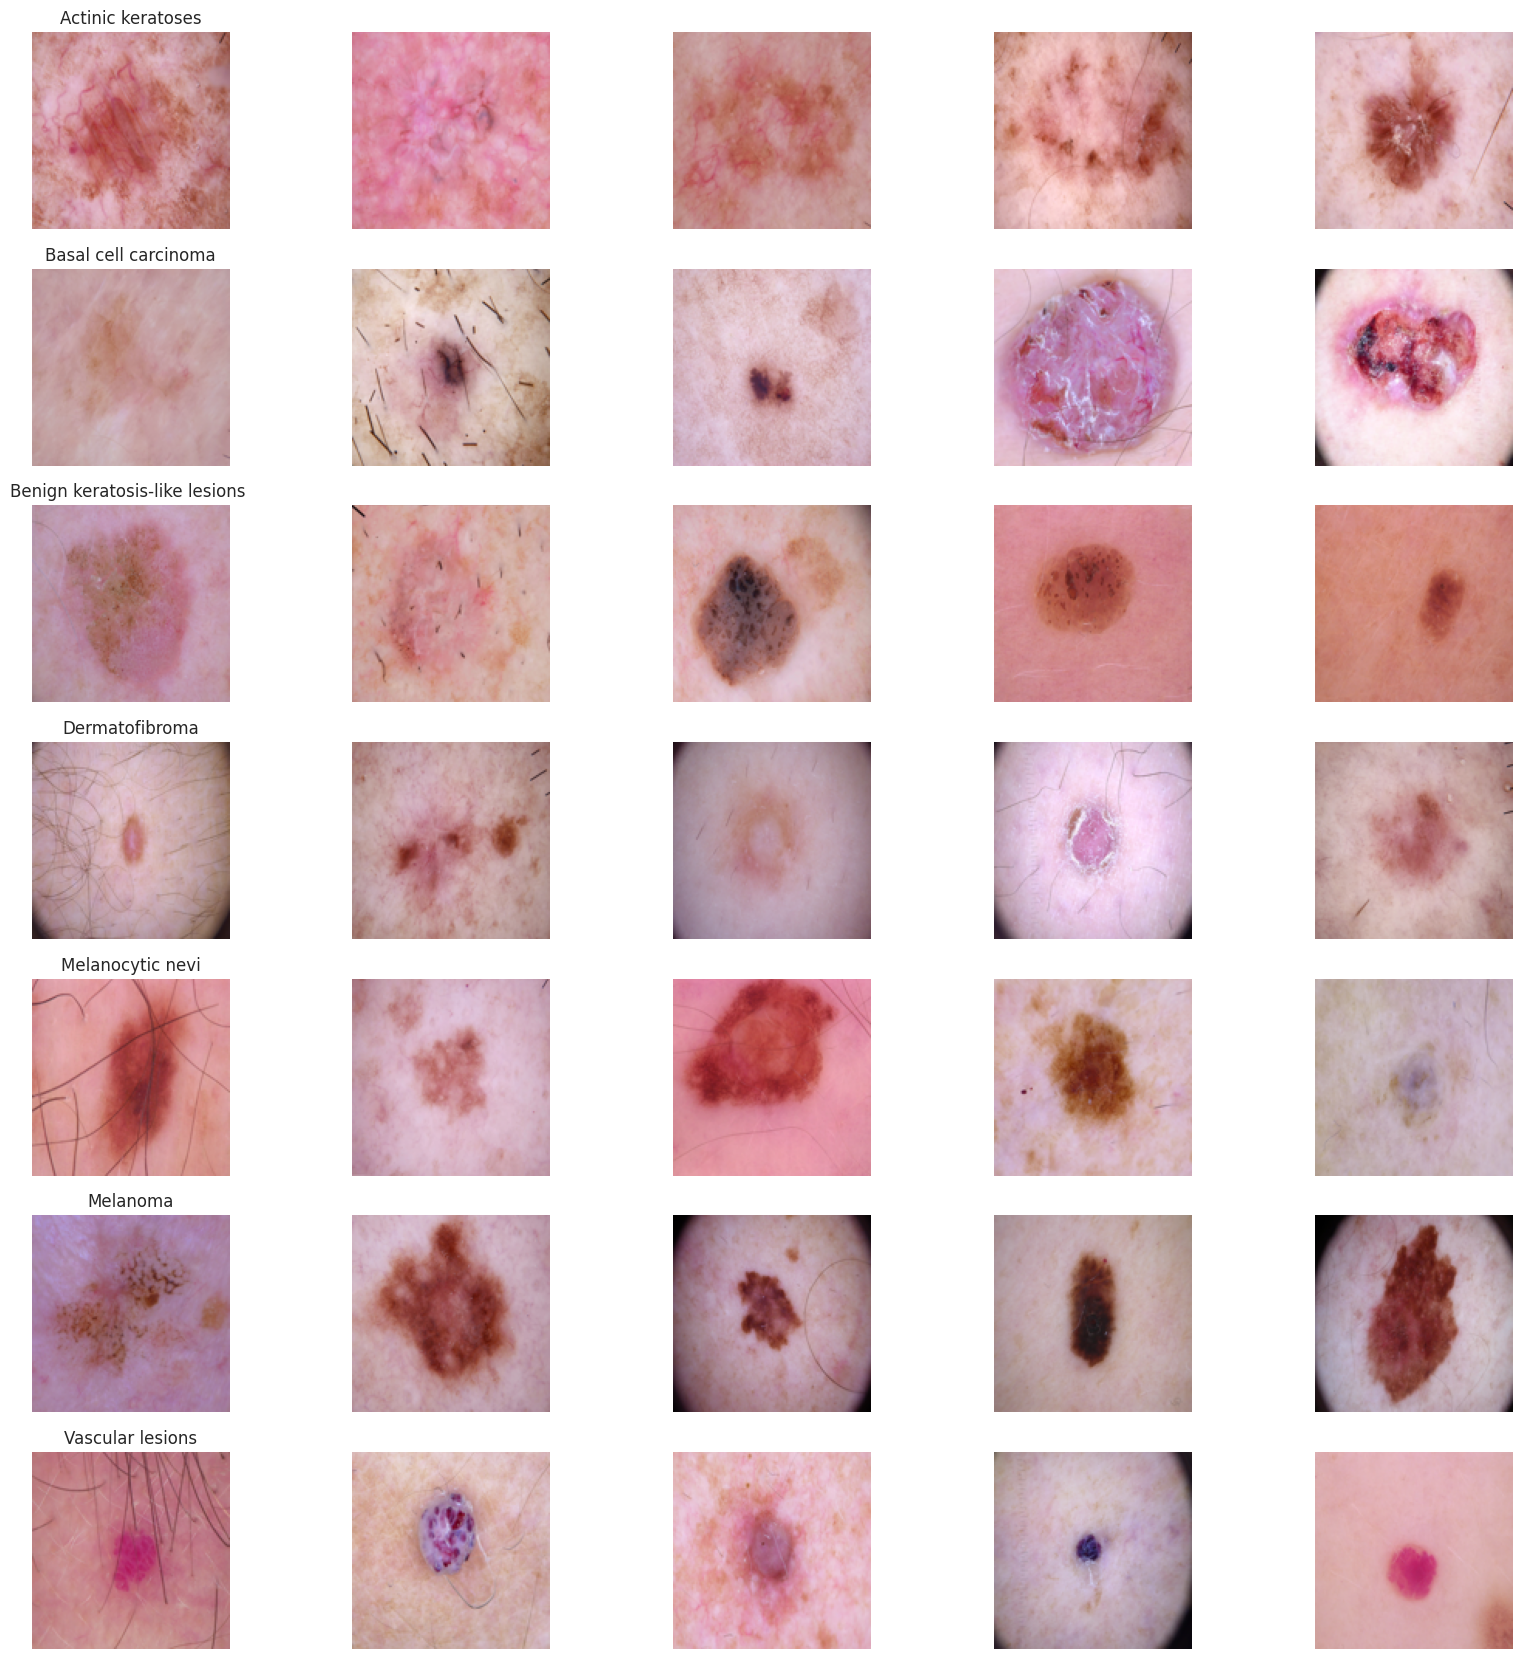

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [ ]:
skin_df['image'].map(lambda x: x.shape).value_counts()

image
(128, 128, 3)    9958
Name: count, dtype: int64

## Removing Un-necessary Columns

In [ ]:
new_skin_df = skin_df.drop(columns = ['lesion_id', 'image_id', 'dx', 'path', 'cell_type'])

In [ ]:
new_skin_df.head()

,dx_type,age,sex,localization,cell_type_idx,image
0,histo,80.0,male,scalp,2,"[[[189, 152, 194], [192, 156, 199], [191, 154,..."
1,histo,80.0,male,scalp,2,"[[[24, 13, 22], [24, 14, 22], [25, 14, 26], [2..."
2,histo,80.0,male,scalp,2,"[[[187, 127, 135], [190, 134, 146], [193, 136,..."
3,histo,80.0,male,scalp,2,"[[[24, 11, 17], [24, 11, 19], [29, 15, 25], [3..."
4,histo,75.0,male,ear,2,"[[[129, 87, 109], [141, 96, 119], [151, 106, 1..."


## Splitting

In [ ]:
features=new_skin_df.drop(columns=['cell_type_idx'],axis=1)
target=new_skin_df['cell_type_idx']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=42)

## Normalising

In [ ]:
import numpy as np

In [ ]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [ ]:
x_train

array([[[[ 0.50019305, -0.29442218, -0.20851783],
         [ 0.54314523, -0.29442218, -0.18704174],
         [ 0.50019305, -0.27294609, -0.20851783],
         ...,
         [ 0.77938219, -0.03670913,  0.00624304],
         [ 0.82233436,  0.00624304,  0.0706713 ],
         [ 0.80085827,  0.02771913,  0.09214739]],

        [[ 0.54314523, -0.29442218, -0.20851783],
         [ 0.50019305, -0.27294609, -0.22999392],
         [ 0.54314523, -0.25147001, -0.22999392],
         ...,
         [ 0.80085827, -0.01523305,  0.04919522],
         [ 0.82233436,  0.02771913,  0.09214739],
         [ 0.77938219,  0.04919522,  0.11362348]],

        [[ 0.52166914, -0.29442218, -0.22999392],
         [ 0.52166914, -0.27294609, -0.20851783],
         [ 0.5860974 , -0.27294609, -0.18704174],
         ...,
         [ 0.82233436,  0.00624304,  0.0706713 ],
         [ 0.77938219,  0.04919522,  0.09214739],
         [ 0.80085827,  0.0706713 ,  0.13509957]],

        ...,

        [[ 0.50019305, -0.27294609, -0

## Converting Target As One Hot (Label Encoding)




In [ ]:
import keras
from keras.utils import to_categorical # used for converting labels to one-hot-encoding

In [ ]:
y_train_o

2401    6
449     2
2496    1
715     2
809     2
       ..
5746    4
5203    4
5402    4
860     2
7282    4
Name: cell_type_idx, Length: 7966, dtype: int8

In [ ]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], *(128, 128, 3))
x_test = x_test.reshape(x_test.shape[0], *(128, 128, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(128, 128, 3))

In [ ]:
x_train[0]

array([[[ 0.90823871, -0.16556566, -0.01523305],
        [ 0.86528654, -0.22999392, -0.14408957],
        [ 0.90823871, -0.18704174, -0.05818522],
        ...,
        [ 0.9297148 , -0.07966131,  0.09214739],
        [ 0.84381045, -0.14408957, -0.01523305],
        [ 0.95119089, -0.05818522,  0.00624304]],

       [[ 0.95119089, -0.1011374 ,  0.11362348],
        [ 0.9297148 , -0.16556566, -0.01523305],
        [ 0.9297148 , -0.14408957,  0.00624304],
        ...,
        [ 0.82233436, -0.05818522,  0.24248   ],
        [ 0.67200175, -0.22999392,  0.09214739],
        [ 0.86528654, -0.16556566, -0.12261348]],

       [[ 0.99414306, -0.05818522,  0.17805174],
        [ 0.95119089, -0.18704174, -0.01523305],
        [ 0.9297148 , -0.20851783, -0.03670913],
        ...,
        [ 0.82233436, -0.18704174, -0.05818522],
        [ 0.80085827, -0.12261348,  0.15657565],
        [ 0.67200175, -0.25147001, -0.1011374 ]],

       ...,

       [[ 0.60757349, -0.46623088, -0.22999392],
        [ 0

## Model Building

In [ ]:
import tensorflow as tf

In [ ]:
input_shape = (128, 128, 3)
num_classes = 7

In [ ]:
model = keras.models.Sequential([
  tf.keras.layers.Conv2D(32,
                         kernel_size=3,
                         activation="relu",
                         input_shape=input_shape),
  tf.keras.layers.Conv2D(32,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation="relu"),
  tf.keras.layers.Conv2D(64, 3, activation="relu"),
  tf.keras.layers.Conv2D(64, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.40),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(num_classes, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        36928     
                                                        

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=["accuracy"])

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
# Fit the model
epochs = 30
batch_size = 16
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), # next time ---use model.fit()
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

<ipython-input-51-8752d787ff9c>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), # next time ---use model.fit()


Epoch 1/30
448/448 [==============================] - 48s 92ms/step - loss: 0.9764 - accuracy: 0.6631 - val_loss: 0.9162 - val_accuracy: 0.6801 - lr: 0.0010
Epoch 2/30
448/448 [==============================] - 38s 85ms/step - loss: 0.9001 - accuracy: 0.6766 - val_loss: 0.9046 - val_accuracy: 0.6976 - lr: 0.0010
Epoch 3/30
448/448 [==============================] - 36s 80ms/step - loss: 0.8610 - accuracy: 0.6859 - val_loss: 0.8238 - val_accuracy: 0.7051 - lr: 0.0010
Epoch 4/30
448/448 [==============================] - 40s 90ms/step - loss: 0.8255 - accuracy: 0.7053 - val_loss: 0.8104 - val_accuracy: 0.7064 - lr: 0.0010
Epoch 5/30
448/448 [==============================] - 38s 84ms/step - loss: 0.7833 - accuracy: 0.7158 - val_loss: 0.7856 - val_accuracy: 0.7265 - lr: 0.0010
Epoch 6/30
448/448 [==============================] - 37s 84ms/step - loss: 0.7592 - accuracy: 0.7238 - val_loss: 0.7824 - val_accuracy: 0.7252 - lr: 0.0010
Epoch 7/30
448/448 [==============================] - 37s 

## Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

25/25 [==============================] - 0s 14ms/step - loss: 0.6692 - accuracy: 0.7817
Validation: accuracy = 0.781681  ;  loss_v = 0.669168
Test: accuracy = 0.757530  ;  loss = 0.689005


Text(0, 0.5, 'accuracy')

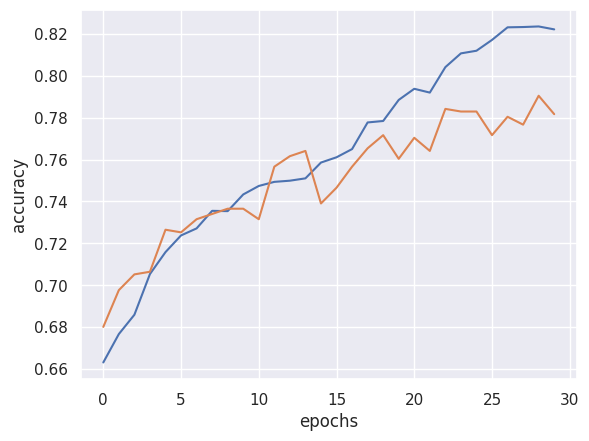

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

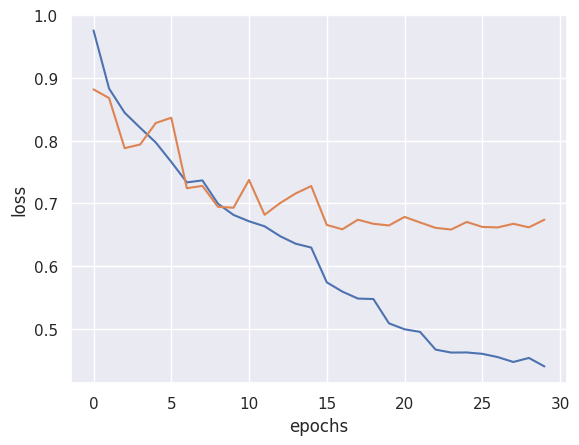

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

AttributeError: 'numpy.ndarray' object has no attribute 'class_names'

# New Approach with CNN

We can see that the model is stuck at `79%`...there could be many reasons. The one main issue that I have identified is that there is massive `Class Imbalance`.

It is leading to the slightly overfitting the model.


> We can overcome this issue by allocating similar Classes.

In [ ]:
skin_df['cell_type'].value_counts()

cell_type
Melanocytic nevi                  6660
Melanoma                          1111
Benign keratosis-like lesions     1089
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: count, dtype: int64

To address the issue...

- I have planned to take Top 4 Classes.
- We can see that Melanocytic Nevi has 6660 images and it is causing `class imbalance`... so I have planned to take 2000 images.
- For the rest of features I'll take the original number of images.

## Preprocessing

In [ ]:
nevi_df = skin_df[skin_df.cell_type == 'Melanocytic nevi']

In [ ]:

nevi_df = nevi_df[:800]

In [ ]:
melanoma_df = skin_df[skin_df.cell_type == 'Melanoma']

In [ ]:
melanoma_df = melanoma_df[:800]

In [ ]:
benign_df = skin_df[skin_df.cell_type == 'Benign keratosis-like lesions ']

In [ ]:
benign_df = benign_df[:800]

In [ ]:
basal_df = skin_df[skin_df.cell_type == 'Basal cell carcinoma']

In [ ]:

new_skin_df = pd.concat([nevi_df, melanoma_df, benign_df, basal_df])

In [ ]:
new_skin_df['cell_type'].value_counts()

cell_type
Melanocytic nevi                  800
Melanoma                          800
Benign keratosis-like lesions     800
Basal cell carcinoma              514
Name: count, dtype: int64

- dropping rest of the features

In [ ]:
lesion_type_dict

{'nv': 'Melanocytic nevi',
 'mel': 'Melanoma',
 'bkl': 'Benign keratosis-like lesions ',
 'bcc': 'Basal cell carcinoma',
 'akiec': 'Actinic keratoses',
 'vasc': 'Vascular lesions',
 'df': 'Dermatofibroma'}

In [ ]:
new_skin_df['cell_type'].value_counts()

cell_type
Melanocytic nevi                  800
Melanoma                          800
Benign keratosis-like lesions     800
Basal cell carcinoma              514
Name: count, dtype: int64

In [ ]:
new_skin_df['cell_type_idx'].dtype

dtype('int8')

In [ ]:
#Updating

new_skin_df.loc[new_skin_df['dx'] == 'nv', 'cell_type_idx'] = 0
new_skin_df.loc[new_skin_df['dx'] == 'mel', 'cell_type_idx'] = 1
new_skin_df.loc[new_skin_df['dx'] == 'bkl', 'cell_type_idx'] = 2
new_skin_df.loc[new_skin_df['dx'] == 'bcc', 'cell_type_idx'] = 3

## Splitting

In [ ]:
features=new_skin_df.drop(columns=['cell_type_idx'],axis=1)
target=new_skin_df['cell_type_idx']

In [ ]:
features['cell_type'].value_counts()

cell_type
Melanocytic nevi                  800
Melanoma                          800
Benign keratosis-like lesions     800
Basal cell carcinoma              514
Name: count, dtype: int64

In [ ]:
target.value_counts()

cell_type_idx
0    800
1    800
2    800
3    514
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=42)

## Normalising

In [ ]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

## Converting Target As One Hot (Label Encoding)


In [ ]:
import keras
from keras.utils import to_categorical # used for converting labels to one-hot-encoding

In [ ]:


y_train = to_categorical(y_train_o, num_classes = 4)
y_test = to_categorical(y_test_o, num_classes = 4)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [ ]:


x_train = x_train.reshape(x_train.shape[0], *(128, 128, 3))
x_test = x_test.reshape(x_test.shape[0], *(128, 128, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(128, 128, 3))

## Model Building

In [ ]:
input_shape = (128, 128, 3)
num_classes = 4

In [ ]:
model_1 = keras.models.Sequential([
  tf.keras.layers.Conv2D(32,
                         kernel_size=3,
                         activation="relu",
                         input_shape=input_shape),
  tf.keras.layers.Conv2D(32,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation="relu"),
  tf.keras.layers.Conv2D(64, 3, activation="relu"),
  tf.keras.layers.Conv2D(64, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.40),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(num_classes, activation="softmax")
])

NameError: name 'tf' is not defined

In [ ]:
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=["accuracy"])

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# With data augmentation to prevent overfitting
tf.random.set_seed(42)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

In [ ]:
# Fit the model
epochs = 25
batch_size = 16
history = model_1.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), # next time ---use model.fit()
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/50
212/212 [==============================] - 7s 29ms/step - loss: 0.8108 - accuracy: 0.6435 - val_loss: 0.7406 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 2/50
212/212 [==============================] - 7s 35ms/step - loss: 0.6571 - accuracy: 0.7237 - val_loss: 0.7011 - val_accuracy: 0.7090 - lr: 0.0010
Epoch 3/50
212/212 [==============================] - 6s 28ms/step - loss: 0.6459 - accuracy: 0.7314 - val_loss: 0.6383 - val_accuracy: 0.7487 - lr: 0.0010
Epoch 4/50
212/212 [==============================] - 7s 35ms/step - loss: 0.5987 - accuracy: 0.7563 - val_loss: 0.5498 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 5/50
212/212 [==============================] - 6s 27ms/step - loss: 0.5787 - accuracy: 0.7636 - val_loss: 0.5253 - val_accuracy: 0.7619 - lr: 0.0010
Epoch 6/50
212/212 [==============================] - 7s 35ms/step - loss: 0.5861 - accuracy: 0.7572 - val_loss: 0.5287 - val_accuracy: 0.7884 - lr: 0.0010
Epoch 7/50
212/212 [==============================] - 6s 28ms/st

## Model Evaluation

In [ ]:
loss, accuracy = model_1.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model_1.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

12/12 [==============================] - 0s 5ms/step - loss: 0.4277 - accuracy: 0.8280
Validation: accuracy = 0.828042  ;  loss_v = 0.427714
Test: accuracy = 0.825027  ;  loss = 0.420774


Text(0, 0.5, 'accuracy')

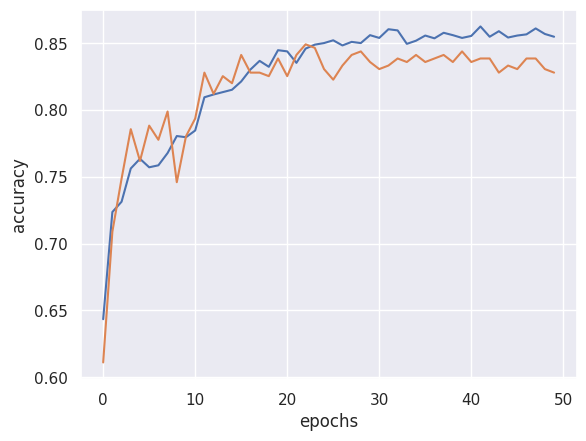

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

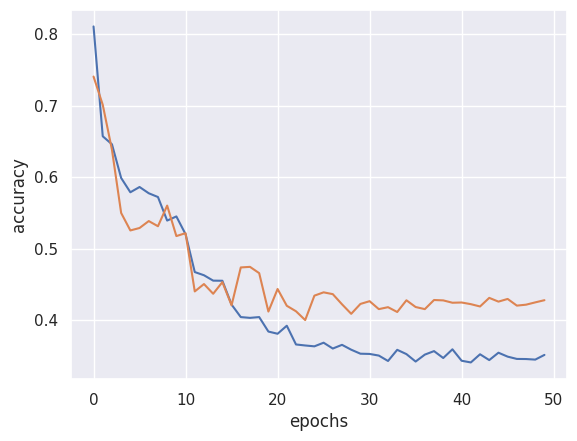

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epochs')
plt.ylabel('accuracy')

# Using Transfer Learning

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_hub as hub

In [ ]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [ ]:
# create_model() to create a model from URL

def create_model(model_url, num_classes = 10):
    """
    Takes a Tensorflow Hub url and creates a Keras sequential model

    Args:
        model_url(str): A tensorflow hub feature extraction url
        num_classes (int): Number of output neurons in the output layer,
        should be equal to number of target classes, default 10


    Returns:
        An uncompiled keras Sequential model with model_url as feature extractor
        layer and Dense output layer with num_classes output neurons.
    """

    # Download pre-trained model
    feature_extractor_layer = hub.KerasLayer(model_url,
                                             trainable=True, # freeze already trained model
                                             name = 'feature_extraction_layer',
                                             input_shape=(128, 128)+ (3,))

    # Download our own model
    model = tf.keras.Sequential([
        feature_extractor_layer,
        tf.keras.layers.Dense(num_classes, activation = 'softmax', name = 'output_layer')
    ])

    return model

## EfficientNetB0

In [ ]:
efficient = create_model(efficientnet_url, 4)

In [ ]:
efficient.compile(loss = 'categorical_crossentropy',
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['accuracy'])

In [ ]:
efficientnet_history = efficient.fit_generator(datagen.flow(x_train,y_train, batch_size=16),
                              epochs = 25, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 16,
                                callbacks=[learning_rate_reduction]
)

Epoch 1/25


<ipython-input-82-e47ea13d84d5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  efficientnet_history = efficient.fit_generator(datagen.flow(x_train,y_train, batch_size=16),


131/131 [==============================] - 74s 161ms/step - loss: 0.9155 - accuracy: 0.6901 - val_loss: 2.4079 - val_accuracy: 0.4957 - lr: 0.0010
Epoch 2/25
131/131 [==============================] - 17s 129ms/step - loss: 0.6995 - accuracy: 0.7871 - val_loss: 0.7498 - val_accuracy: 0.7564 - lr: 0.0010
Epoch 3/25
131/131 [==============================] - 16s 121ms/step - loss: 0.6368 - accuracy: 0.8035 - val_loss: 0.7800 - val_accuracy: 0.7991 - lr: 0.0010
Epoch 4/25
131/131 [==============================] - 15s 115ms/step - loss: 0.6026 - accuracy: 0.8289 - val_loss: 0.7620 - val_accuracy: 0.7821 - lr: 0.0010
Epoch 5/25
131/131 [==============================] - 16s 121ms/step - loss: 0.5588 - accuracy: 0.8414 - val_loss: 0.5742 - val_accuracy: 0.8419 - lr: 0.0010
Epoch 6/25
131/131 [==============================] - 16s 124ms/step - loss: 0.4970 - accuracy: 0.8707 - val_loss: 0.6790 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 7/25
131/131 [==============================] - 16s 120ms

In [ ]:
# function to plot loss curves

import matplotlib.pyplot as plt
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics

    Args:
        history: Tensorflow History object.

    Returns:
        Plots of training/validation loss and accuracy metrics.
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss

    plt.plot(epochs, loss, label = 'training loss')
    plt.plot(epochs, val_loss, label = 'val loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label = 'training accuracy')
    plt.plot(epochs, val_accuracy, label = 'val accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

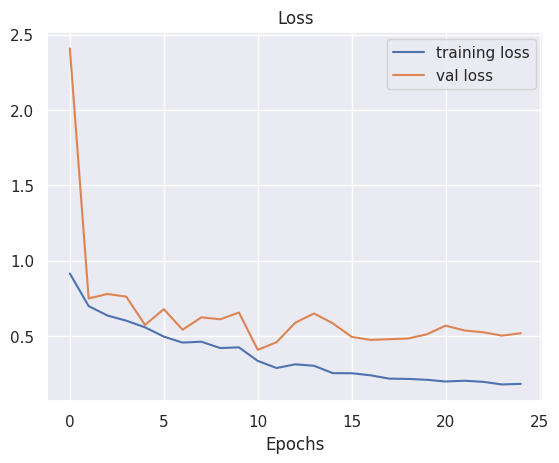

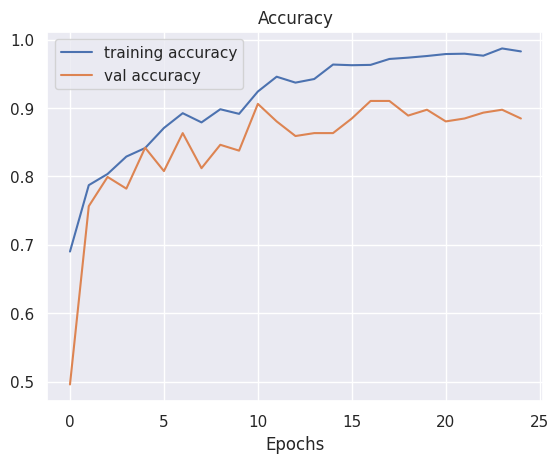

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
loss, accuracy = efficient.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = efficient.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

8/8 [==============================] - 0s 30ms/step - loss: 0.5196 - accuracy: 0.8846
Validation: accuracy = 0.884615  ;  loss_v = 0.519636
Test: accuracy = 0.890223  ;  loss = 0.559584


## ResNet v2

In [ ]:
resnet = create_model(resnet_url, 4)

In [ ]:
resnet.compile(loss = 'categorical_crossentropy',
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['accuracy'])

In [ ]:
resnet_history = resnet.fit(datagen.flow(x_train,y_train, batch_size=16),
                              epochs = 25, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 16
                              , callbacks=[learning_rate_reduction]
)

Epoch 1/25
131/131 [==============================] - 56s 159ms/step - loss: 1.1749 - accuracy: 0.6607 - val_loss: 23.6535 - val_accuracy: 0.4915 - lr: 0.0010
Epoch 2/25
131/131 [==============================] - 13s 96ms/step - loss: 1.0142 - accuracy: 0.7198 - val_loss: 1.2651 - val_accuracy: 0.6752 - lr: 0.0010
Epoch 3/25
131/131 [==============================] - 12s 92ms/step - loss: 0.9452 - accuracy: 0.7420 - val_loss: 1.1505 - val_accuracy: 0.5940 - lr: 0.0010
Epoch 4/25
131/131 [==============================] - 13s 100ms/step - loss: 0.9383 - accuracy: 0.7463 - val_loss: 1.2509 - val_accuracy: 0.6966 - lr: 0.0010
Epoch 5/25
131/131 [==============================] - 13s 102ms/step - loss: 0.9300 - accuracy: 0.7641 - val_loss: 1.2408 - val_accuracy: 0.6197 - lr: 0.0010
Epoch 6/25
131/131 [==============================] - 13s 100ms/step - loss: 0.9187 - accuracy: 0.7621 - val_loss: 1.0215 - val_accuracy: 0.7692 - lr: 0.0010
Epoch 7/25
131/131 [==============================] -

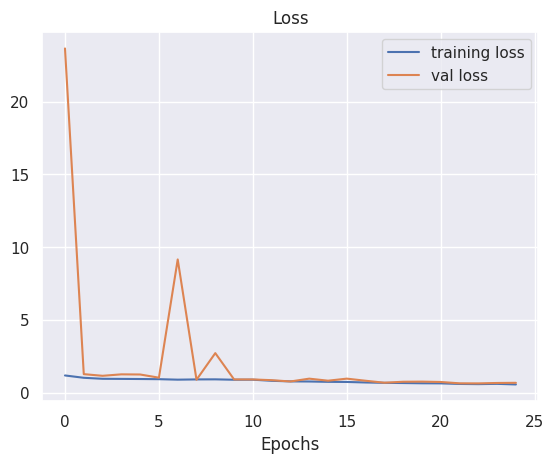

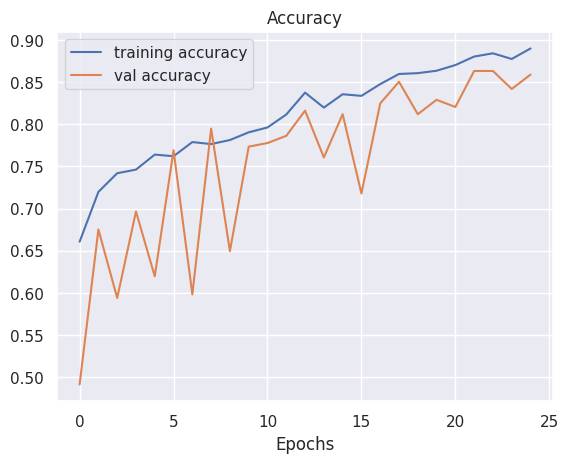

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
loss, accuracy = resnet.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = resnet.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

8/8 [==============================] - 0s 31ms/step - loss: 0.6689 - accuracy: 0.8590
Validation: accuracy = 0.858974  ;  loss_v = 0.668898
Test: accuracy = 0.821612  ;  loss = 0.705758


## MobileNet V2

In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/050-128-feature-vector/versions/2",
                   trainable=True),
    tf.keras.layers.Dense(units=4,
                          activation="softmax") # output layer
    ])

In [ ]:
m.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

In [ ]:
m.build([None, 128, 128, 3])

In [ ]:
mnet_history = m.fit(datagen.flow(x_train,y_train, batch_size=16),
                              epochs = 40, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 16
                              , callbacks=[learning_rate_reduction])

Epoch 1/40


KeyboardInterrupt: 

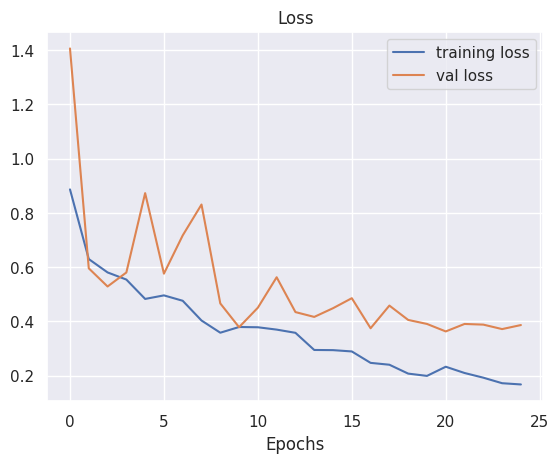

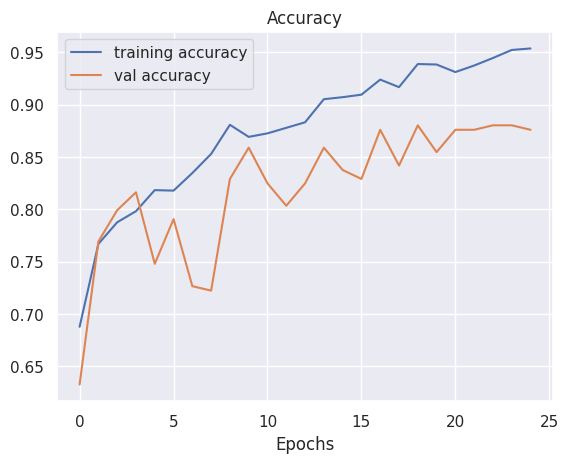

In [ ]:
plot_loss_curves(mnet_history)

In [ ]:
loss, accuracy = m.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = m.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

8/8 [==============================] - 0s 11ms/step - loss: 0.3862 - accuracy: 0.8761
Validation: accuracy = 0.876068  ;  loss_v = 0.386179
Test: accuracy = 0.871355  ;  loss = 0.487183


## Inception V3

In [ ]:
inception = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/inception-v3/frameworks/TensorFlow2/variations/classification/versions/2",
                   trainable=True),
    tf.keras.layers.Dense(units=4,
                          activation="softmax")
])

In [ ]:
inception.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

In [ ]:
inception.build([None, 128, 128, 3])

In [ ]:
inception_history = inception.fit(datagen.flow(x_train,y_train, batch_size=16),
                              epochs = 35, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 16
                              , callbacks=[learning_rate_reduction])

Epoch 1/35
131/131 [==============================] - 81s 249ms/step - loss: 2.2444 - accuracy: 0.4483 - val_loss: 48093644.0000 - val_accuracy: 0.2607 - lr: 0.0010
Epoch 2/35
131/131 [==============================] - 14s 109ms/step - loss: 1.4848 - accuracy: 0.5848 - val_loss: 300.0931 - val_accuracy: 0.5684 - lr: 0.0010
Epoch 3/35
131/131 [==============================] - 15s 114ms/step - loss: 1.7145 - accuracy: 0.6175 - val_loss: 1708.6184 - val_accuracy: 0.5684 - lr: 0.0010
Epoch 4/35
131/131 [==============================] - 15s 114ms/step - loss: 1.4325 - accuracy: 0.6545 - val_loss: 4539.3853 - val_accuracy: 0.3205 - lr: 0.0010
Epoch 5/35
131/131 [==============================] - ETA: 0s - loss: 1.5077 - accuracy: 0.5147
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
131/131 [==============================] - 14s 108ms/step - loss: 1.5077 - accuracy: 0.5147 - val_loss: 10.5327 - val_accuracy: 0.5513 - lr: 0.0010
Epoch 6/35
131/131 [=============

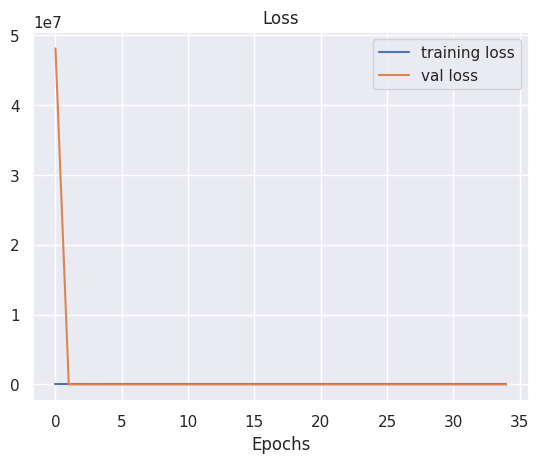

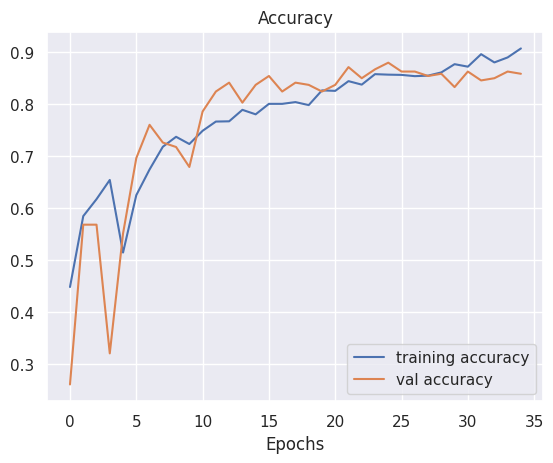

In [ ]:
plot_loss_curves(inception_history)

In [ ]:
loss, accuracy = inception.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = inception.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

8/8 [==============================] - 0s 26ms/step - loss: 0.6585 - accuracy: 0.8590
Validation: accuracy = 0.858974  ;  loss_v = 0.658472
Test: accuracy = 0.826758  ;  loss = 0.713698


## EfficientNet v2

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.model_download("keras/efficientnetv2/keras/efficientnetv2_b0")

print("Path to model files:", path)

100%|██████████| 656/656 [00:00<00:00, 274kB/s]
Extracting model files...


Path to model files: /root/.cache/kagglehub/models/keras/efficientnetv2/keras/efficientnetv2_b0/2


In [ ]:
pip install keras_cv

In [ ]:
import keras

In [ ]:
import keras_cv

In [ ]:
# Create a model using a pretrained backbone
backbone = keras_cv.models.EfficientNetV2Backbone.from_preset(
    "efficientnetv2_b0_imagenet"
)
model = keras_cv.models.ImageClassifier(
    backbone=backbone,
    num_classes=4,
    activation="softmax",
)
model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Train your model
history = model.fit(datagen.flow(x_train,y_train, batch_size=16),
                              epochs = 15, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 16
                              , callbacks=[learning_rate_reduction]
)

Epoch 1/15
131/131 [==============================] - 58s 142ms/step - loss: 0.7156 - accuracy: 0.7054 - val_loss: 0.5506 - val_accuracy: 0.7863 - lr: 0.0010
Epoch 2/15
131/131 [==============================] - 15s 112ms/step - loss: 0.5503 - accuracy: 0.7857 - val_loss: 0.3792 - val_accuracy: 0.8162 - lr: 0.0010
Epoch 3/15
131/131 [==============================] - 16s 122ms/step - loss: 0.4845 - accuracy: 0.8126 - val_loss: 0.4201 - val_accuracy: 0.8291 - lr: 0.0010
Epoch 4/15
131/131 [==============================] - 16s 125ms/step - loss: 0.4116 - accuracy: 0.8438 - val_loss: 0.3708 - val_accuracy: 0.8291 - lr: 0.0010
Epoch 5/15
131/131 [==============================] - 16s 122ms/step - loss: 0.3985 - accuracy: 0.8472 - val_loss: 0.3627 - val_accuracy: 0.8376 - lr: 0.0010
Epoch 6/15
131/131 [==============================] - 15s 111ms/step - loss: 0.3677 - accuracy: 0.8659 - val_loss: 0.4136 - val_accuracy: 0.8248 - lr: 0.0010
Epoch 7/15
131/131 [==============================] 

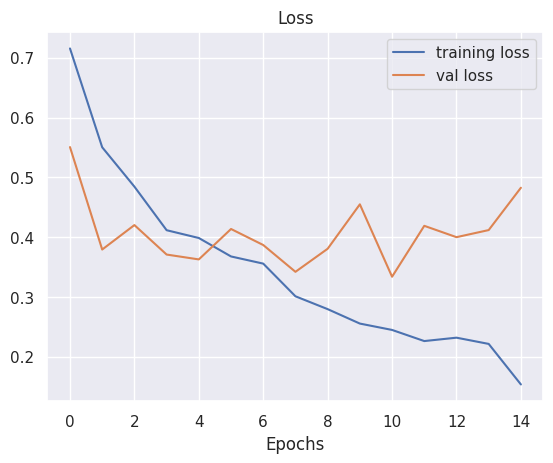

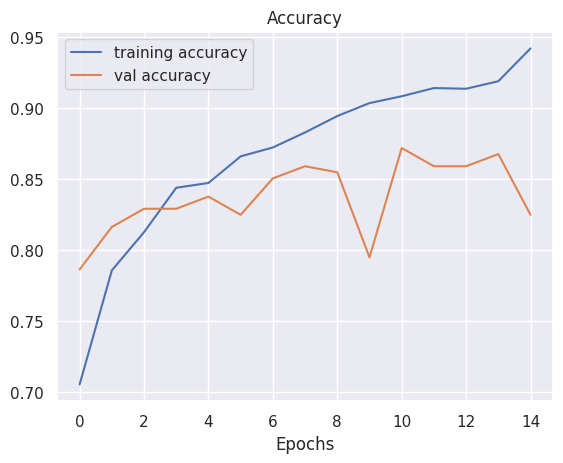

In [ ]:
plot_loss_curves(history)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

8/8 [==============================] - 0s 43ms/step - loss: 0.4826 - accuracy: 0.8248
Validation: accuracy = 0.824786  ;  loss_v = 0.482595
Test: accuracy = 0.840480  ;  loss = 0.494209
